In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [4]:
base_path = './data-no-trash'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2526


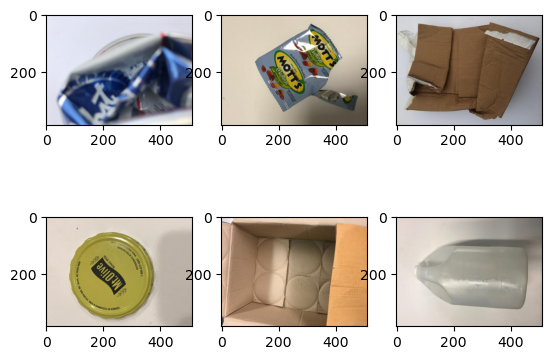

In [5]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2288 images belonging to 6 classes.
Found 252 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'other', 4: 'paper', 5: 'plastic'}


In [7]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

# Take a Shot

In [8]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

C:\Users\Felix\AppData\Local\Temp\ipykernel_16756\3189617050.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)


Epoch 1/20
143/143 [==============================] - 35s 240ms/step - loss: 1.6097 - acc: 0.2618 - val_loss: 1.5288 - val_acc: 0.3016
Epoch 2/20
143/143 [==============================] - 34s 238ms/step - loss: 1.3932 - acc: 0.4038 - val_loss: 1.2514 - val_acc: 0.4881
Epoch 3/20
143/143 [==============================] - 34s 240ms/step - loss: 1.3016 - acc: 0.4441 - val_loss: 1.2743 - val_acc: 0.4286
Epoch 4/20
143/143 [==============================] - 34s 239ms/step - loss: 1.2344 - acc: 0.4847 - val_loss: 1.2199 - val_acc: 0.4841
Epoch 5/20
143/143 [==============================] - 34s 240ms/step - loss: 1.2034 - acc: 0.4930 - val_loss: 1.1820 - val_acc: 0.5437
Epoch 6/20
143/143 [==============================] - 35s 241ms/step - loss: 1.1622 - acc: 0.5227 - val_loss: 1.3478 - val_acc: 0.4246
Epoch 7/20
143/143 [==============================] - 35s 241ms/step - loss: 1.1151 - acc: 0.5420 - val_loss: 1.1226 - val_acc: 0.5714
Epoch 8/20
143/143 [==============================] - 3

1/1 [==============================] - 0s 89ms/step


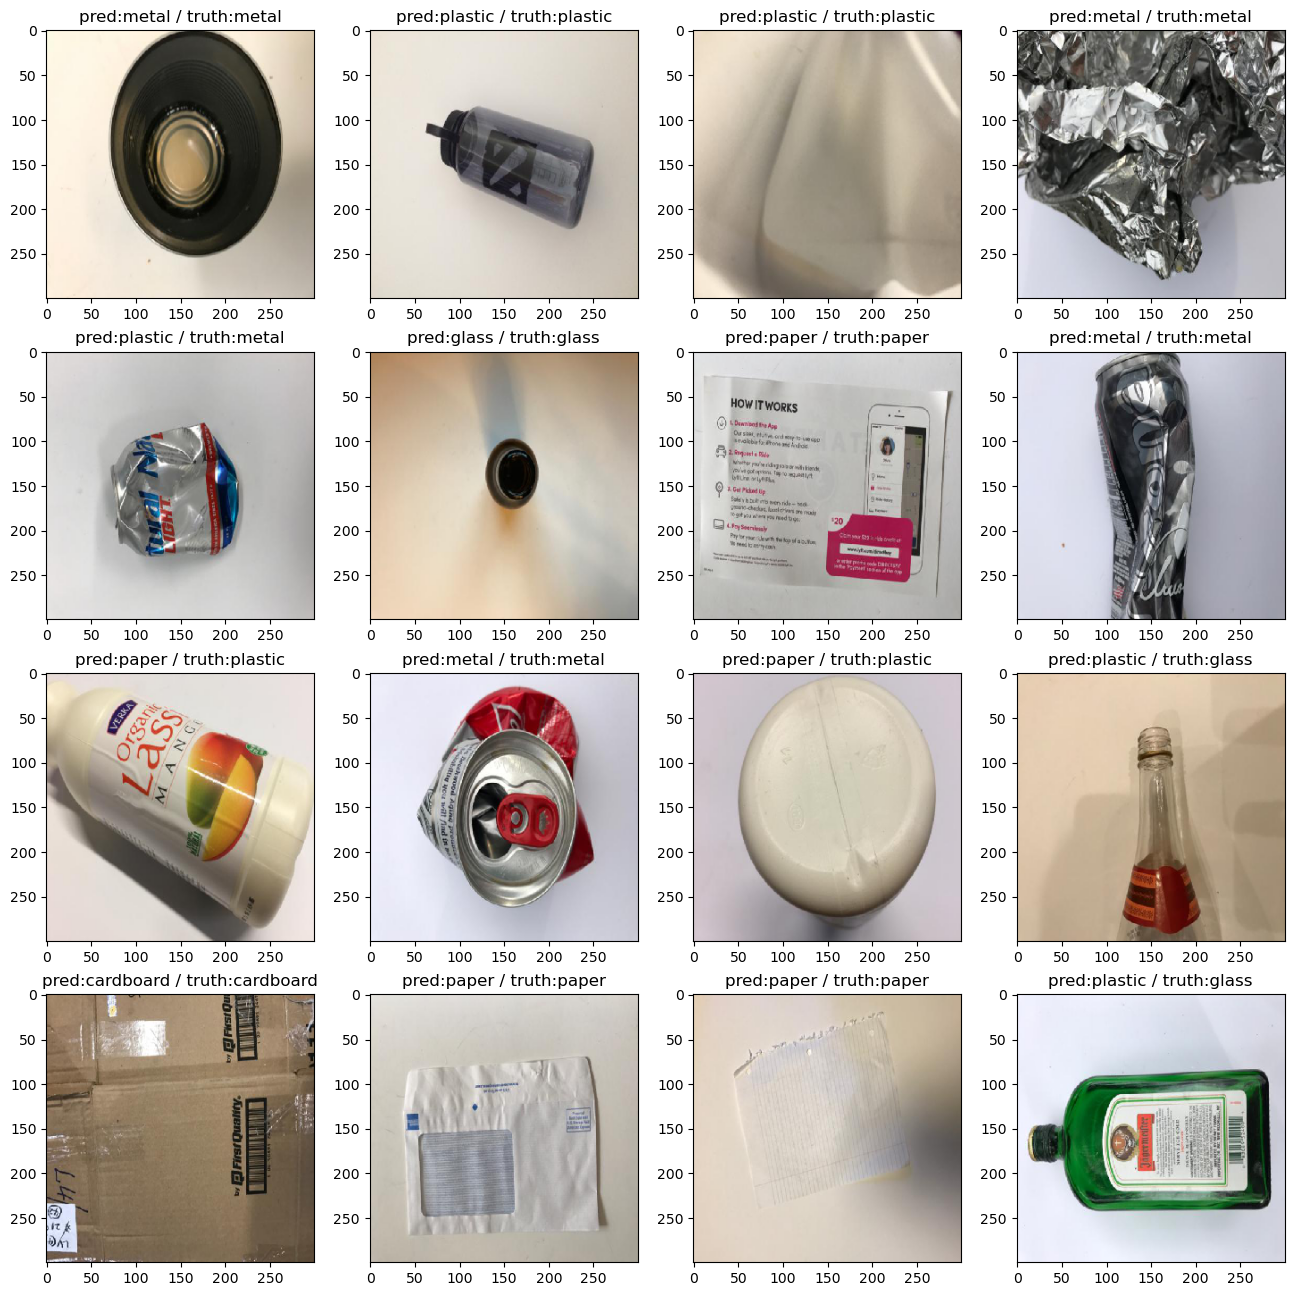

In [13]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])